In [1]:
import cv2 as cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
img = np.zeros([100,100,3],dtype=np.uint8)
img.fill(0) # or img[:] = 255
img[20:60, 20:80] = 255

img2 = np.zeros([100,100,3],dtype=np.uint8)
img2.fill(0) # or img[:] = 255
img2[20:60, 20:40] = 255

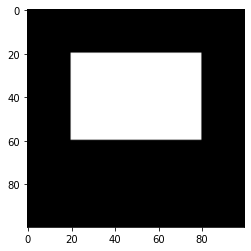

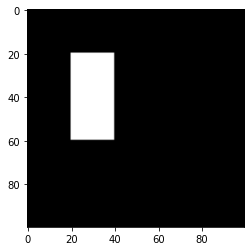

In [3]:
plt.imshow(img)
plt.show()
plt.imshow(img2)

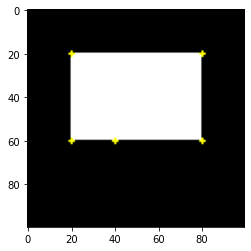

In [4]:
pt1 = np.float32([[20,20],
               [80, 20],
               [20, 60],
               [80, 60]])

sensor_pt1 = np.float32([40,60])

for x,y in pt1:
    landmarks = cv2.circle(img, (x,y), 1, (255, 255, 0), -1)

landmarks = cv2.circle(img, tuple(sensor_pt1) , 1, (255, 255, 0), -1)
plt.imshow(landmarks)

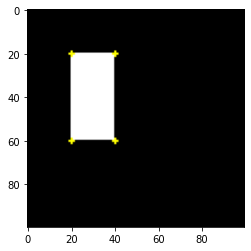

In [5]:
pt2 = np.float32([[40,20],
               [40, 60],
               [20, 60],
               [20, 20]])

for x,y in pt2:
    landmarks2 = cv2.circle(img2, (x,y), 1, (255, 255, 0), -1)
plt.imshow(landmarks2)

In [6]:
M, extra = cv2.estimateAffine2D(pt1, pt2)

In [7]:
M

array([[-0.        , -0.5       , 50.        ],
       [ 0.66666667, -1.        , 26.66666667]])

In [42]:
rows, cols, ch = img.shape
dst = cv2.warpAffine(img, M, (cols, rows))

In [31]:
test_loc = np.append(sensor_pt1, np.float32(1))

In [46]:
np.dot(M, test_loc)

array([20.        , -6.66666667])